# Aula 2

In [2]:
import pandas as pd

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [3]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [4]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [5]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Aula 3

In [7]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3645055324417282


# Aula 4

In [8]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0756856623533981


# Aula 5

In [9]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.800717231778


# Aula 6

In [10]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [11]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [12]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36454314826693845 1.075812734747931 3431.800540734651


In [13]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.2525349499118608 1.2146078236842535 1622.355261359549


In [14]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03935845055689697 3.5236412827908055 301.17673152106556
0.36454314826693845 1.075812734747931 3431.800540734651


In [15]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36871947128237154 1.0562346825020208 1204.1115110650273
0.3538212950180423 1.139783250125324 1194.934780331434
0.36685269244474583 1.0988027839846315 1167.5299723518192


# Aula 7

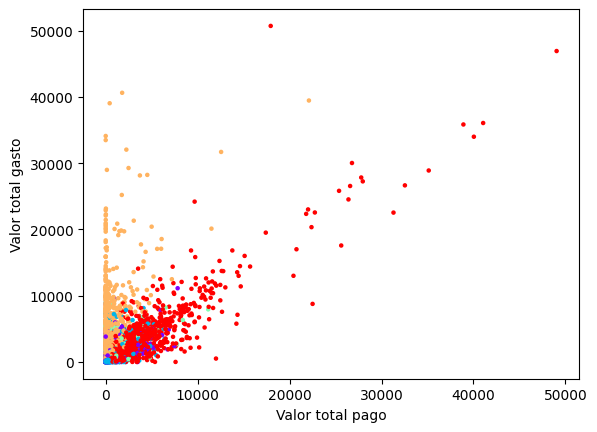

In [16]:
#as vezes é preciso executar duas vezes esse trecho para a imagem aparecer na tela
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

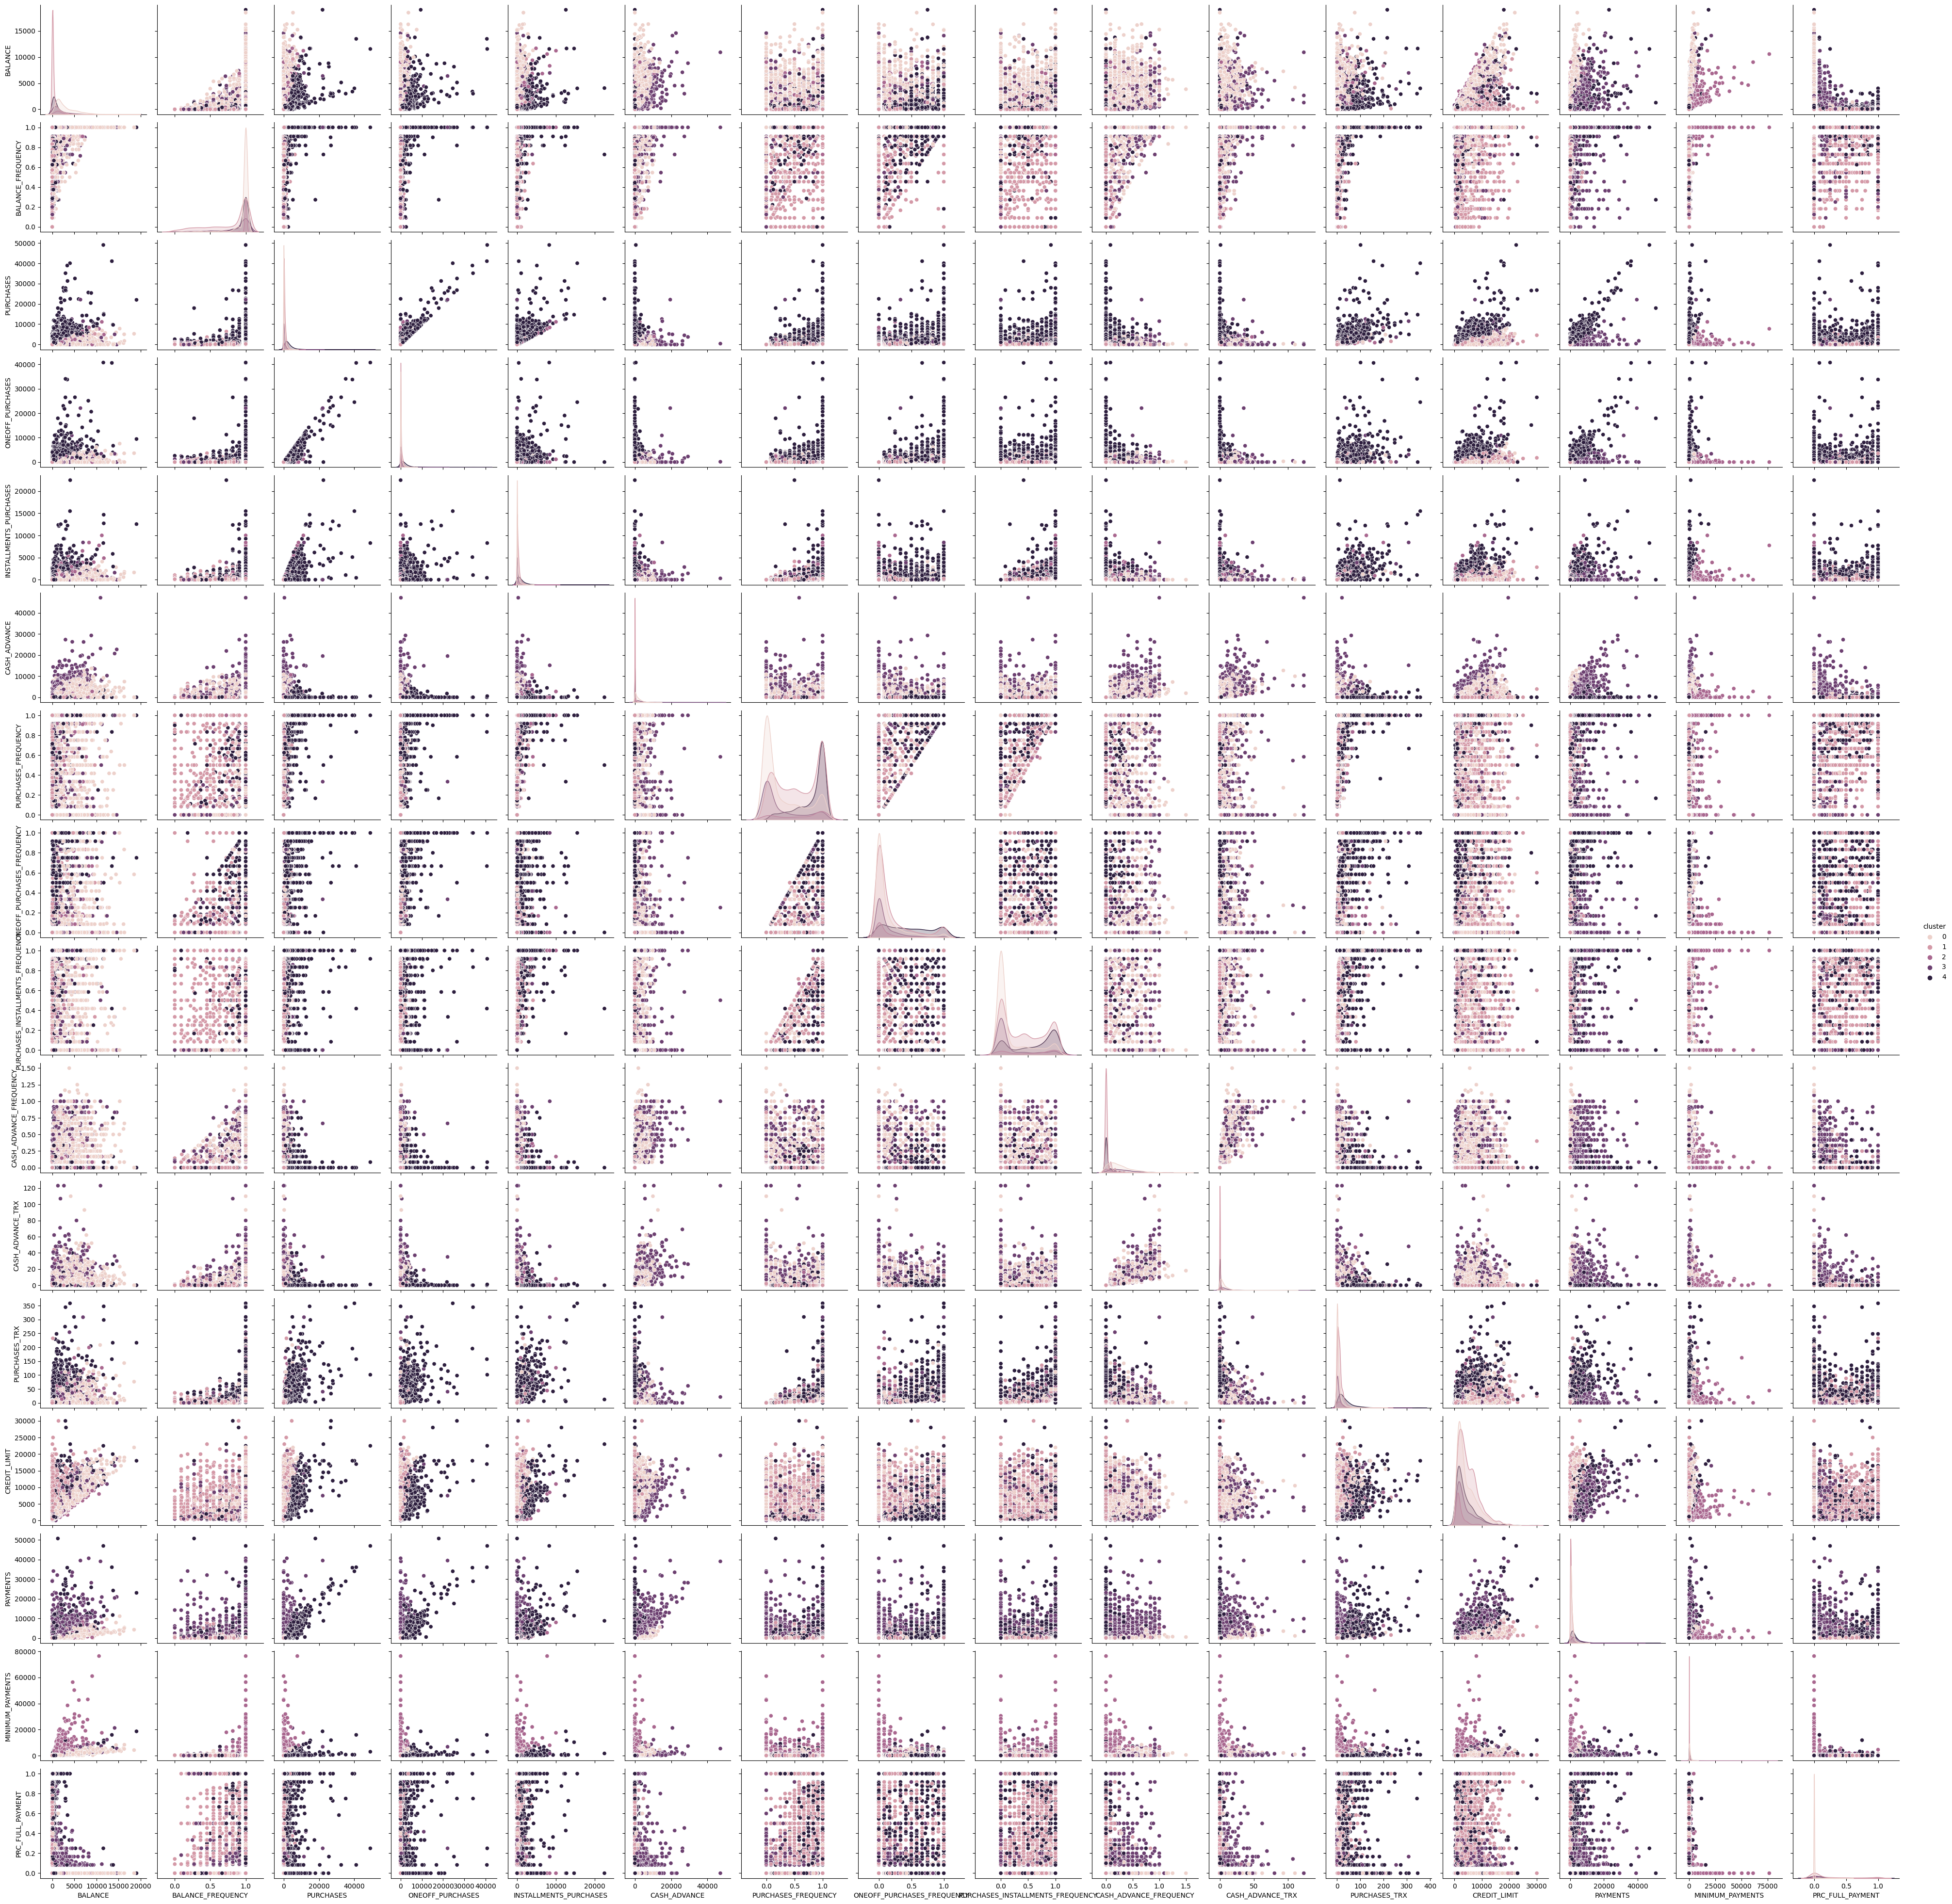

In [17]:
#é normal demorar bastante para executar o pairplot
#e se aparecer uma mensagem em vermelho do tipo "RuntimeWarning", pode ignorar e continue esperando que uma hora os gráficos vão aparecer :)
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

# Aula 8

In [18]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
1        3280.0   443.746756   846.398201   0.000000    23.365333   
2         411.0  1987.501586  1854.459156  70.794108  1018.958891   
3        1072.0  1794.637544  1983.094646   0.000000   506.925348   
4        1539.0  1144.165942  1664.223404   0.000000   212.743922   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
1          82.941478   410.126095   9630.367575            3280.0  0.774389   
2        1337.287314  2138.678431  11670.179850             411.0  0.989486   
3        1087.920500  2316.353276  14581.459140            1072.0  0.862113   
4         556.359504  1372.605793  19043.138560            1539.0  0.928301   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.437428   8345.641905           2648.0  0.001800   
1        ...       248.733727   4483.503862           3280.0  0.246806   
2        ...      7112.618584  76406.207520            411.0  0.019318   
3        ...       886.834603  21235.065300           1072.0  0.117280   
4        ...       525.257953  18621.013310           1539.0  0.277969   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023264  0.0  0.0  0.000000  0.000000  0.6  
1        0.346748  0.0  0.0  0.000000  0.444444  1.0  
2        0.090901  0.0  0.0  0.000000  0.000000  1.0  
3        0.186888  0.0  0.0  0.083333  0.142857  1.0  
4        0.366883  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [19]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.04294070e-01 2.72242076e-04 6.17554553e-02 3.62405829e-02
  2.55365937e-02 2.52765717e-01 6.72943541e-05 2.57072238e-05
  4.50409323e-05 5.74261583e-05 1.15669149e-03 1.33139220e-03
  7.19260678e-01 1.66160406e-01 1.79203910e-01 5.52512128e-07]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [2.35417892e-01 2.16635031e-04 6.01593847e-02 3.41108036e-02
  2.60537957e-02 4.00438484e-01 5.27178877e-05 2.04676638e-05
  3.52785951e-05 6.55507889e-05 1.57259277e-03 1.12193031e-03
  5.35208153e-01 5.97633409e-01 1.04565201e-01 2.77429650e-05]
 [1.

In [20]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [23]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3038.132314   385.096760   1636.114441   4496.336858   968.599396   
1         443.746756   629.249107    141.482978   5130.547795   814.294226   
2        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
3        1794.637544   470.990466   3269.757206   3974.040310  4701.016454   
4        1144.165942  3274.047005    185.924210   4102.378266  3045.625330   

         n_clients  
cluster             
0             2648  
1             3280  
2              411  
3             1072  
4             1539  


# Aula 9

*A ordem dos clusters pode estar invertida aqui, porém não tem problema, cada linha vai representar um cluster diferente*.

**CLUSTER 0**: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

**CLUSTER 1**: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

**CLUSTER 2**: Clientes que gastam muito com compras. Melhores pagadores.

**CLUSTER 3**: Clientes que gastam muito com saques. Pagam as vezes.

**CLUSTER 4**: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [24]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        2648.0  0.001800  0.023264  0.0  0.0  0.000000  0.000000  0.6
1        3280.0  0.246806  0.346748  0.0  0.0  0.000000  0.444444  1.0
2         411.0  0.019318  0.090901  0.0  0.0  0.000000  0.000000  1.0
3        1072.0  0.117280  0.186888  0.0  0.0  0.083333  0.142857  1.0
4        1539.0  0.277969  0.366883  0.0  0.0  0.083333  0.545455  1.0